# Loan Prediction Model

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv(r'C:\Users\1234\OneDrive\Desktop\INTERNSHIPS ETC\CODECLAUSE\PROJECT 1\data\Loan_Data.csv')


In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
data=df.copy()



## Categorical Classification

In [18]:
data[data["Loan_Status"] == "Y"]["Gender"].value_counts()


Male      339
Female     75
Name: Gender, dtype: int64

### Loan Approval Status

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
type_ = ["Y", "N"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Loan_Status'].value_counts(), name="Loan_Status"))

# Use of `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Loan Approval Status",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='loan_status', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Loan Approval with respect to Gender

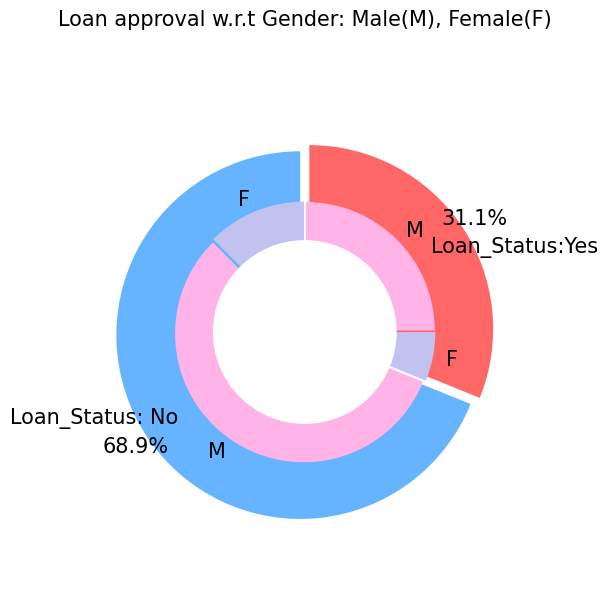

In [21]:
plt.figure(figsize=(6, 6))
labels =["Loan_Status: No","Loan_Status:Yes"]
values = [data.Loan_Status[data.Loan_Status == "Y"].groupby(by = data.Gender).count().Female + data.Loan_Status[data.Loan_Status == "Y"].groupby(by = data.Gender).count().Male,
          data.Loan_Status[data.Loan_Status == "N"].groupby(by = data.Gender).count().Female + data.Loan_Status[data.Loan_Status == "N"].groupby(by = data.Gender).count().Male]
labels_gender = ["F","M","F","M"]
sizes_gender = [data.Loan_Status[data.Loan_Status == "Y"].groupby(by = data.Gender).count().Female,
                data.Loan_Status[data.Loan_Status == "Y"].groupby(by = data.Gender).count().Male,
                data.Loan_Status[data.Loan_Status == "N"].groupby(by = data.Gender).count().Female,
                data.Loan_Status[data.Loan_Status == "N"].groupby(by = data.Gender).count().Male]

colors = ['#66b3ff','#ff6666']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Loan approval w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()


### Loan Approval based on Number of Dependents

In [23]:
color_map = {"Y": "#00EEEE", "N": "#DC143C"}
fig = px.histogram(data, x="Dependents", color="Loan_Status", barmode="group", title="<b>Loan approval based on Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Loan Approval based on Self Employment Status

In [25]:
color_map = {"Y": "#698B69", "N": "#483D8B"}
fig = px.histogram(data, x="Self_Employed", color="Loan_Status", barmode="group", title="<b>Loan approval based on Self employment status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Loan approval based on Education status

In [27]:
color_map = {"Y": "#698B69", "N": "#483D8B"}
fig = px.histogram(data, x="Loan_Status", color="Education", barmode="group", title="<b>Loan approval based on Education</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Loan Approval based on Marital Status

In [29]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(data, x="Married", color="Loan_Status", barmode="group", title="<b>Loan approval based on Marital status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Loan Approval based on Property / Collateral 


In [30]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}
fig = px.histogram(data, x="Loan_Status", color="Property_Area", barmode="group", title="<b>Loan approval based on property area</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


## Distribution of Money by Loan Approval status

In [41]:
def kdeplot(param, x_title):
    
    sns.set_context("paper",font_scale=1.1)
    ax = sns.kdeplot(param[(data["Loan_Status"] == 'N') ],
                color="Red", shade = True);
    ax = sns.kdeplot(param[(data["Loan_Status"] == 'Y') ],
                ax =ax, color="Blue", shade= True);
    ax.legend(["Not approved","approved"],loc='upper right');
    ax.set_ylabel('Density');
    ax.set_xlabel(x_title);
    ax.set_title("Distribution of " + x_title +" by loan approval status");

$\textit{The distribution of loan amount by loan approval status shows how the loan amounts are spread out for loans} $ <br>
$\textit{that have been approved and loans that have not been approved.}$<br>
$\textit{It helps us understand if approved loans tend to have specific ranges of loan amounts compared to those that are not approved.}$<br> $\textit{This analysis can reveal whether loan amount plays a significant role in the approval decision and if there are any trends, outliers,}$ <br>
$\textit{or overlaps in the data.}$

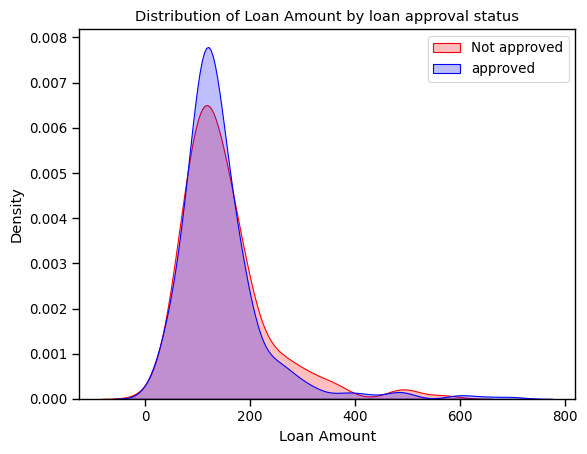

In [42]:
kdeplot(data.LoanAmount, "Loan Amount")


$\textit{The distribution of applicants' income by loan approval status examines how income is spread among }$ <br>
$\textit{individuals whose loans are approved and those whose loans are not. It reveals if there are income }$ <br>
$\textit{differences between approved and not-approved loans, whether income is a primary factor in approvals,}$ <br>
$\textit{and any trends or outliers in income levels.}$

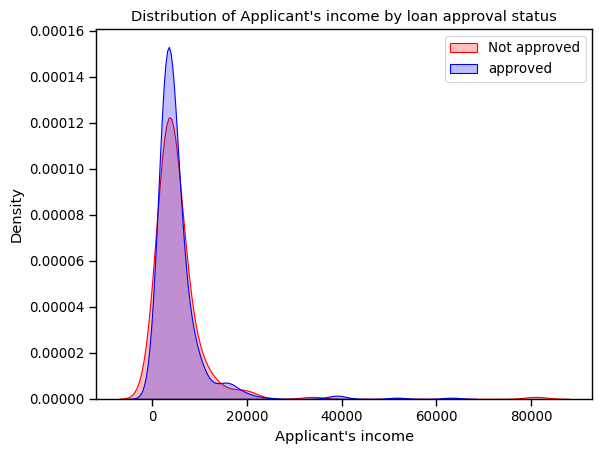

In [44]:
kdeplot(data.ApplicantIncome, "Applicant's income")

$\textit{The distribution of loan term amounts by loan approval status involves understanding }$ <br>
$\textit{how different durations of loan terms are distributed among approved and not-approved } $ <br>
$\textit{loans. It helps identify if there are term length differences between the two categories,}$ <br>
$\textit{if loan term plays a role in approvals, and any unusual cases or trends in term lengths.}$

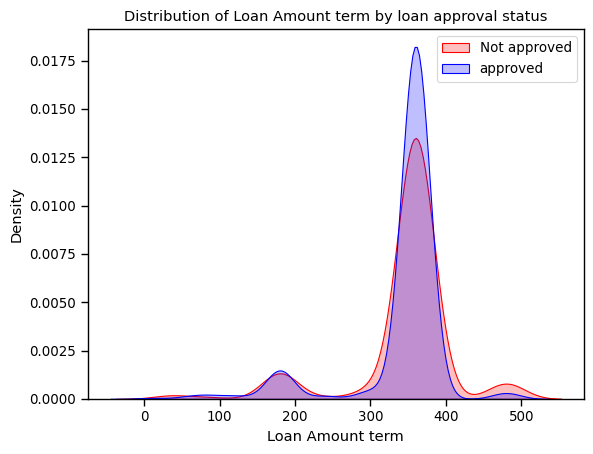

In [46]:
kdeplot(data.Loan_Amount_Term, "Loan Amount term")

## Loan Approval Based on Applicant's Income

In [47]:
data["ApplicantIncome_"] = list(map(lambda x: 'Low' if x <= 2500 
         else('Medium' if (x > 2500 and x <= 4000) 
              else('High' if (x > 4000 and x <= 6000) else 'Very High')), data.ApplicantIncome))

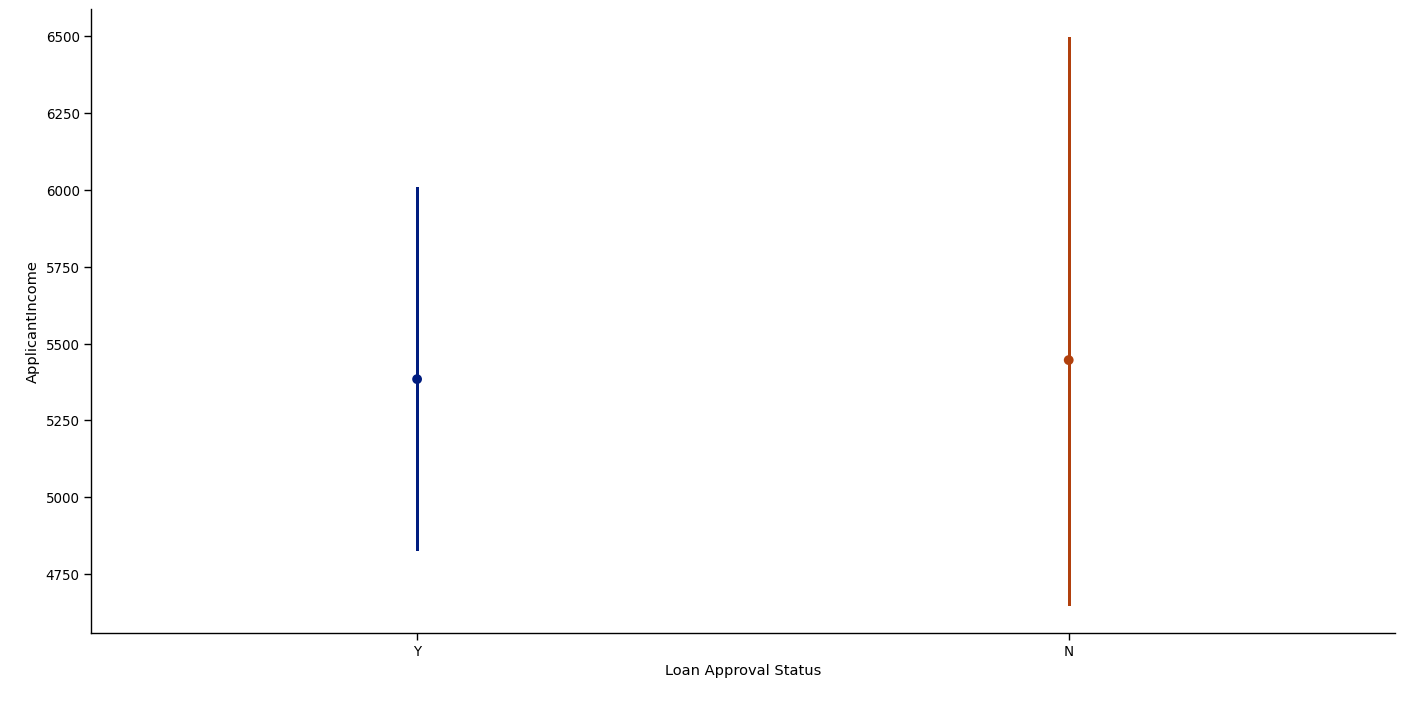

In [52]:
sns.factorplot(y ="ApplicantIncome", size = 7, aspect = 2, data = data, x= "Loan_Status", palette = "dark")
plt.ylabel("\nApplicantIncome")
plt.xlabel("Loan Approval Status\n")
plt.show()

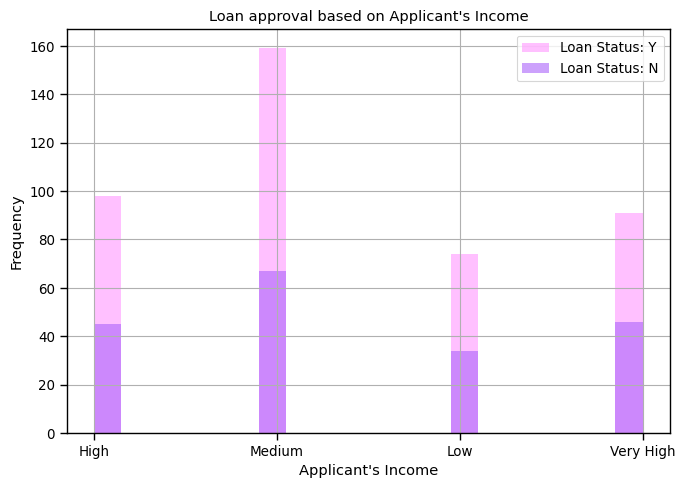

In [49]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}

fig, ax = plt.subplots(figsize=(7, 5))

for status, color in color_map.items():
    subset = data[data["Loan_Status"] == status]
    ax.hist(subset["ApplicantIncome_"], bins=20, alpha=0.6, color=color, label=f'Loan Status: {status}')

ax.set_title("Loan approval based on Applicant's Income")
ax.set_xlabel("Applicant's Income")
ax.set_ylabel("Frequency")
ax.legend()
ax.grid(True)
plt.tight_layout()

plt.show()

$\textit{Applicant's income does not affect the chances of Loan Approval}$ <br>
$\textit{If applicants income is less then chances of Loan approval are high. But most of the  }$ <br>
$\textit{applicants don't have co-applicants hence the value is 0 in that case. }$ <br>
$\textit{Hence this finding of loan approval status depending on co-applicant's income is not promising.}$

## Loan approval based on Loan Amount

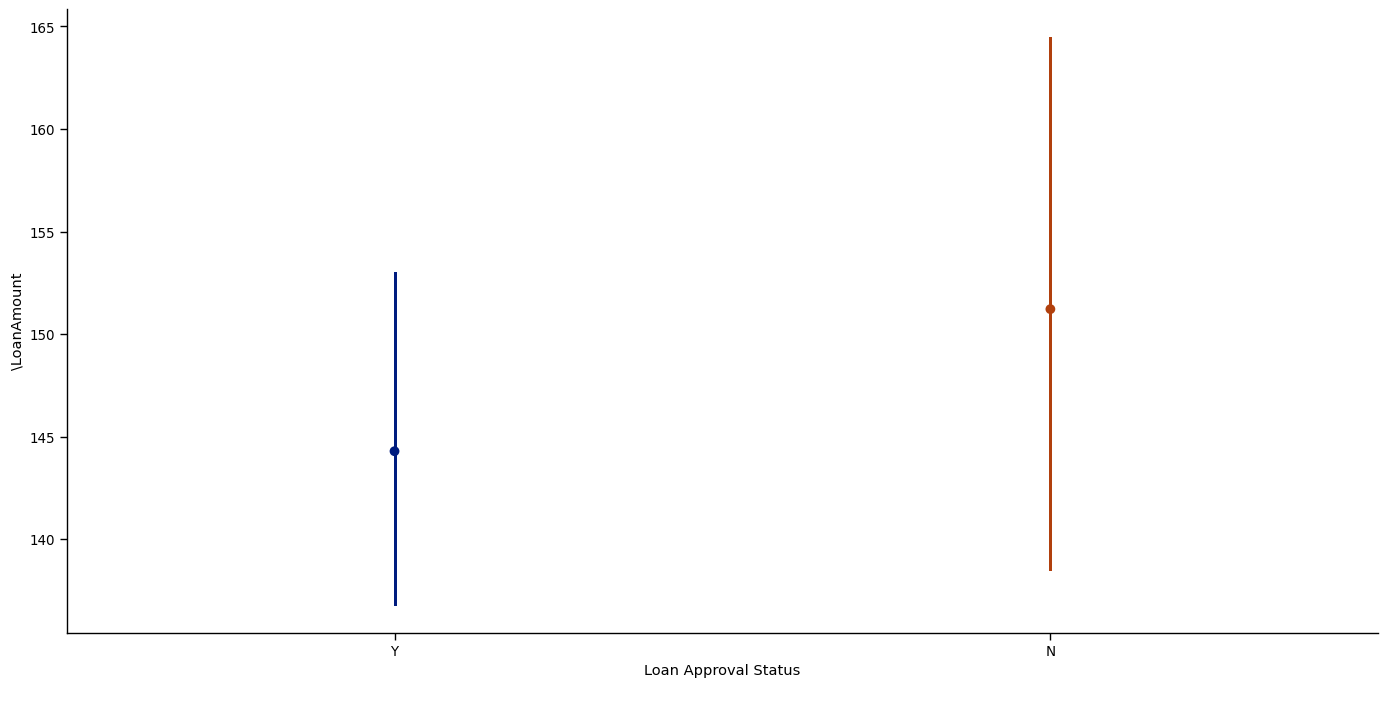

In [53]:
sns.factorplot(y ="LoanAmount", size = 7, aspect = 2, data = data, x= "Loan_Status", palette = "dark")
plt.ylabel("\LoanAmount")
plt.xlabel("Loan Approval Status\n")
plt.show()

In [54]:
data["LoanAmount_"]= list(map(lambda x: 'Low' if x <= 100 
         else('High' if (x > 100 and x <= 200) 
              else('Very High' if (x > 200) else 'Other')), data.LoanAmount))

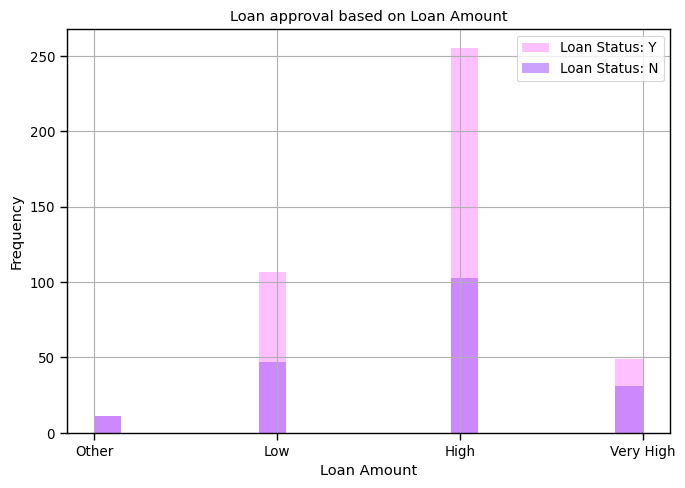

In [55]:
color_map = {"Y": "#FF97FF", "N": "#AB63FA"}

fig, ax = plt.subplots(figsize=(7, 5))

for status, color in color_map.items():
    subset = data[data["Loan_Status"] == status]
    ax.hist(subset["LoanAmount_"], bins=20, alpha=0.6, color=color, label=f'Loan Status: {status}')

ax.set_title("Loan approval based on Loan Amount")
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Frequency")
ax.legend()
ax.grid(True)
plt.tight_layout()

plt.show()

In [77]:
# let's drop all the created variables
data =data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis = 1)


In [78]:
data.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001002',
       'Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006',
       'Loan_ID_LP001008', 'Loan_ID_LP001011', 'Loan_ID_LP001013',
       'Loan_ID_LP001014',
       ...
       'Loan_Status_N', 'Loan_Status_Y', 'ApplicantIncome__High',
       'ApplicantIncome__Low', 'ApplicantIncome__Medium',
       'ApplicantIncome__Very High', 'LoanAmount__High', 'LoanAmount__Low',
       'LoanAmount__Other', 'LoanAmount__Very High'],
      dtype='object', length=641)

In [83]:
data["Dependents"].replace("3+", 3, inplace = True)
data["Loan_Status"].replace("N", 0, inplace = True)
data["Loan_Status"].replace("Y", 1, inplace = True)
data['CoapplicantIncome'] = data['CoapplicantIncome'].replace(0, np.nan, inplace=True)

## Correlation

In [85]:
matrix = data.corr()

<AxesSubplot:>

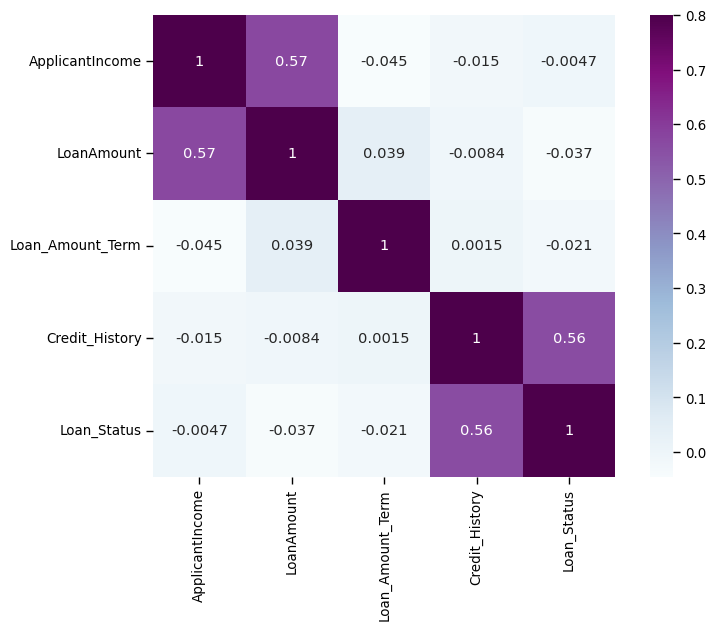

In [88]:
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu", annot = True)

## Missing Value Imputation

In [89]:
missing_values = pd.DataFrame(data.isnull().sum())
missing_values.columns = ["missing_values"]

In [90]:
missing_values.sort_values(by = "missing_values", ascending=False)

,missing_values
CoapplicantIncome,614
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0


In [91]:
missing_values_test.sort_values(by = "missing_values", ascending=False)

,missing_values
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [92]:
data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)
data["Married"].fillna(data["Married"].mode()[0], inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace=True)

In [93]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    614
LoanAmount            22
Loan_Amount_Term      14
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [94]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

$\textit{ The amount 360 has the highest frequency}$

In [95]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace =True)

In [96]:
px.scatter(data, y="LoanAmount")

There are some outliers in Loan amounts parameter hence we should impute the null values with median.


In [97]:
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace =True)

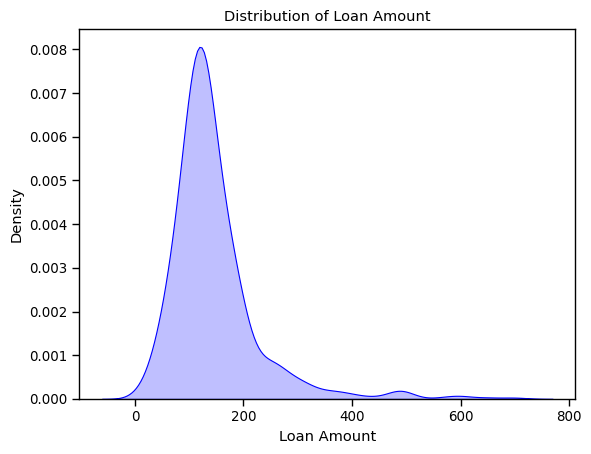

In [98]:
#sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data["LoanAmount"], color="Blue", shade= True);
ax.set_ylabel('Density');
ax.set_xlabel("Loan Amount");
ax.set_title("Distribution of Loan Amount");

Due to the presence of Outliers bulk of data in the Loan amount is at the left and the tail at the right is longer <br>
i.e. $\textbf{the data has Right skewness.}$ we can use Log tranformation to remove the skewness of the data, it does not affect <br>
the small values much but reduces the larger values.

In [99]:
# Building the model
data = data.drop(["Loan_ID"], axis = 1)

In [100]:
X = data.drop("Loan_Status", axis =1)
y = data.Loan_Status

In [101]:
X = pd.get_dummies(X)
data = pd.get_dummies(data)

In [104]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [105]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [106]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

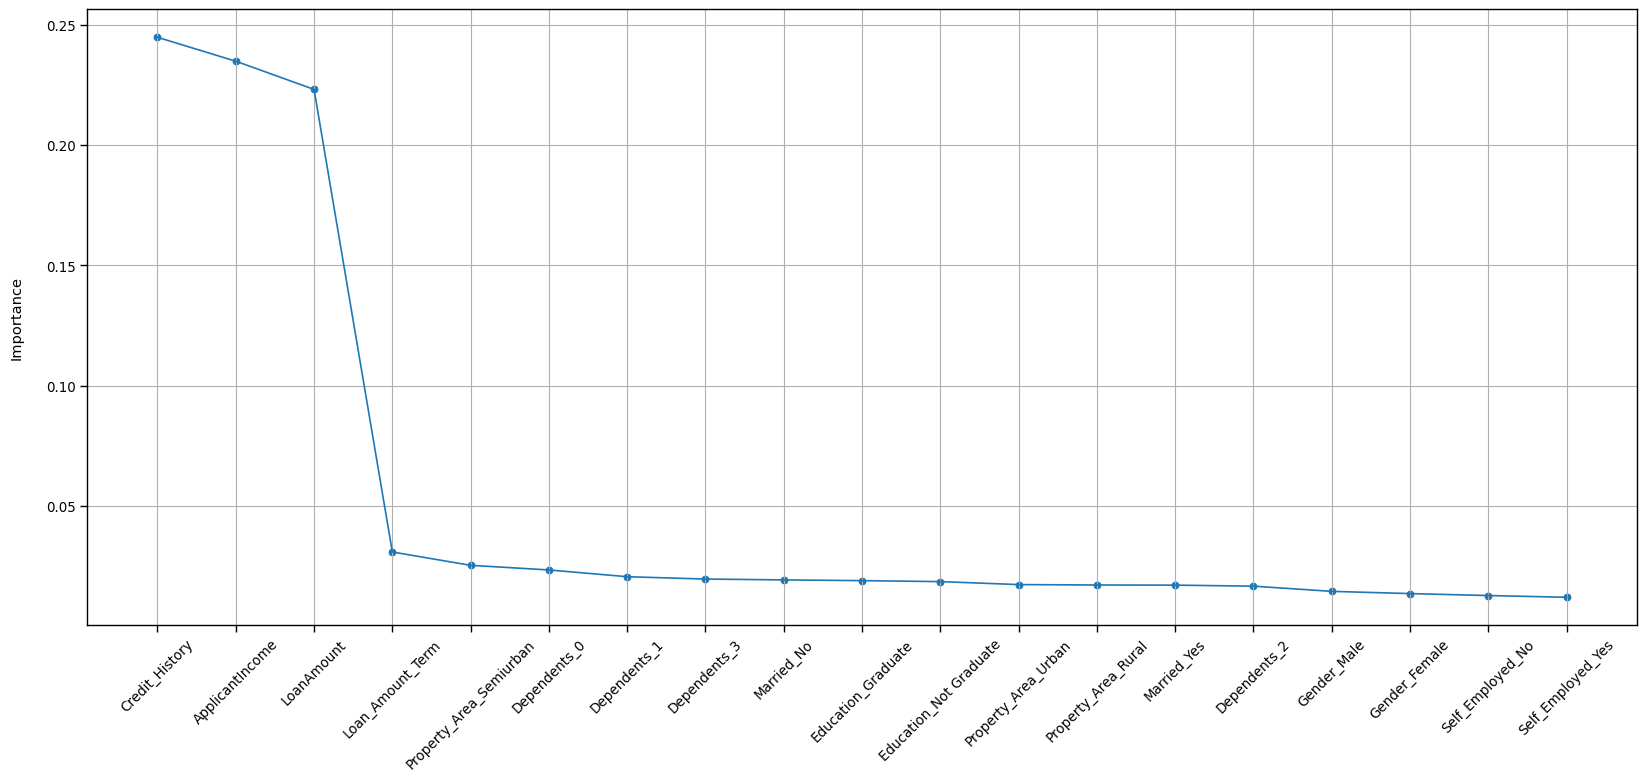

In [110]:
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = X.columns,
                                   columns=['feature_importance']).sort_values('feature_importance',ascending=False)
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.plot(feature_importances)
plt.scatter(y=feature_importances.feature_importance,x=feature_importances.index)
plt.ylabel('Importance\n')
plt.grid()
plt.show()